**1. Import Required Libraries**

In [1]:
#### Step 1: Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**2. Load and Clean the Dataset**

In [2]:
### **Step 2: Load and Explore the Dataset**
# Load the dataset
file_path = "telco.csv" 
df = pd.read_csv("telco.csv")  

# Display first few rows
display(df.head())

# Show dataset information
df.info()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [3]:
# Step 3: Remove irrelevant columns
cols = ["Customer ID", "Zip Code", "Latitude", "Longitude", "State", "City", "Country"]
df = df.drop(columns=[col for col in cols if col in df.columns], errors='ignore')
print("Irrelevant Columns Removed")

Irrelevant Columns Removed


In [4]:
# Step 4: Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
print("Missing Values Handled")

Missing Values Handled


In [5]:
# Encode categorical variables
df_categorical = df.select_dtypes(include=["object"])
label_encoders = {}
for col in df_categorical.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print("Categorical Variables Encoded")

Categorical Variables Encoded


In [8]:
# Define features and target variable
if "Churn Label" in df.columns:
    X = df.drop(columns=["Churn Label"], errors='ignore')
    y = df["Churn Label"]
    print("Features and Target Variable Defined")
else:
    raise KeyError("Target column 'Churn Label' not found in dataset")

Features and Target Variable Defined


In [9]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features Standardized")

Features Standardized


In [10]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Data Split into Train, Validation, and Test Sets")

Data Split into Train, Validation, and Test Sets


In [11]:
# Train the machine learning model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Model Trained Successfully")

Model Trained Successfully


In [12]:
# Save the model
joblib.dump(clf, "telco_model.pkl")
print("Model Saved Successfully")

Model Saved Successfully


In [13]:
# Load the saved model
loaded_model = joblib.load("telco_model.pkl")
print("Model Loaded Successfully")

Model Loaded Successfully


In [16]:
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



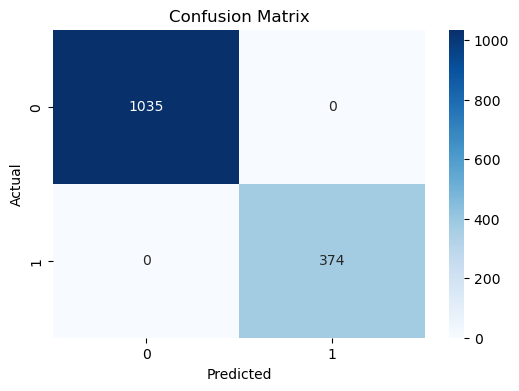

Confusion Matrix Displayed


In [15]:
# Step 11: Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix Displayed")
